### Data Description
The dataset contains more than a thousand reviews about an application openly
available to the public. The data includes reviews and sentiment, i.e., is the review
positive or negative with various other variables.

These are some reviews about the Canva Application and it is a noisy data...Also it is not in standard english dictionary.

Our job is to build a Sentiment Analysis Model

#### About Data

* Review -  Actual text by the user
* Score - Rating from 1 to 5.
* at: Date and Time of review
* replied at: Canva replied back to the customer or not and what did they say
* Sentiment: target variable

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist

In [148]:
canva = pd.read_excel("~/Downloads/Canva_reviews.xlsx")

canva.head(1)

,reviewId,userName,userImage,review,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Sentiment,Sub Category,Sub Category_test
0,gp:AOqpTOFxf3fttcT5DSvFIn9KPp5FErgH9yC533Fmoxv...,Donna Caritero,https://play-lh.googleusercontent.com/a-/AOh14...,Overall it's really an amazing app. I've been ...,4,528,2.116.0,2021-06-17 07:18:54,Hi Donna. We are sorry that your text or desig...,2021-06-19 21:24:32,Negative,NaN,bug_picture_quality


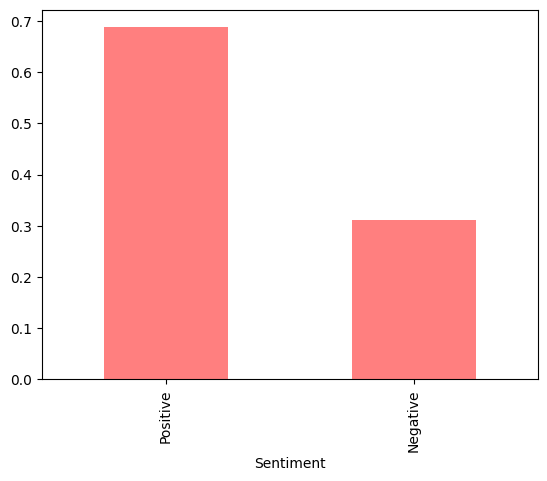

In [10]:
# Lets check the Sentiment

canva.Sentiment.value_counts(normalize = True).plot(kind = "bar", alpha = 0.5, color = "red")
plt.show()

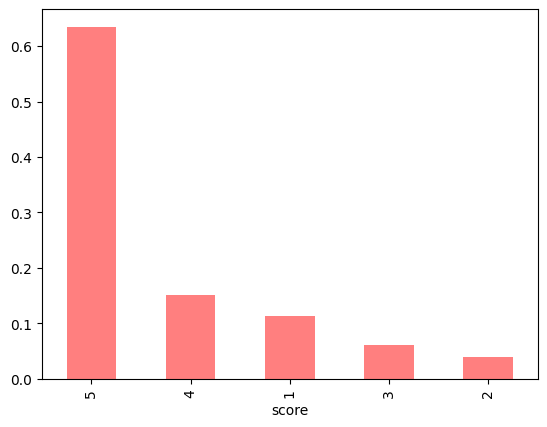

In [11]:
# lets plot score

canva.score.value_counts(normalize = True).plot(kind = "bar", alpha = 0.5, color = "red")
plt.show()

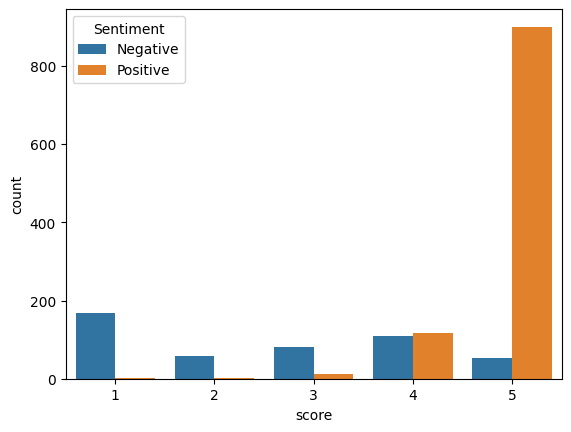

In [12]:
# lets map the score with the sentiment

sns.countplot(x = "score", hue = "Sentiment", data = canva)
plt.show()

# Conclusion: Higher the Rating, Positive the Sentiment...

In [17]:
# lets find the review length

canva["review_len"] =  canva.review.apply(len)

In [18]:
canva.review_len.describe()

count    1500.000000
mean       86.468667
std        55.681355
min        20.000000
25%        54.000000
50%        75.000000
75%       102.000000
max       498.000000
Name: review_len, dtype: float64

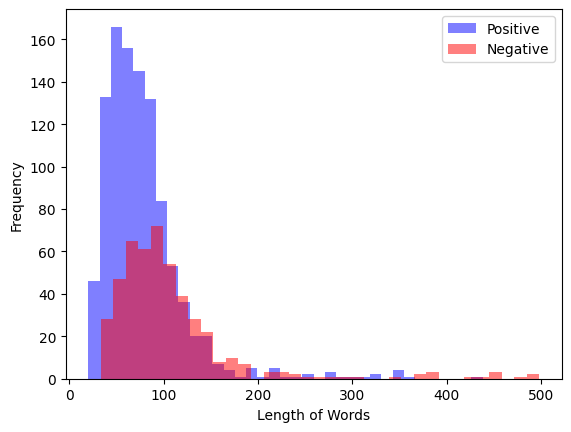

In [21]:
# lets plot the Histogram
# train.loc[train.target==1, "text_len"].plot(kind = "hist", alpha = 0.5, color ="red", bins = 35, label = "spam")
canva.loc[canva.Sentiment=='Positive', "review_len"].plot(kind = "hist", alpha = 0.5, color = "blue", 
                                                          bins = 35,label = "Positive")

canva.loc[canva.Sentiment=='Negative', "review_len"].plot(kind = "hist", alpha = 0.5, color = "red", 
                                                          bins = 35,label = "Negative")
plt.xlabel("Length of Words")

plt.legend()
plt.show()

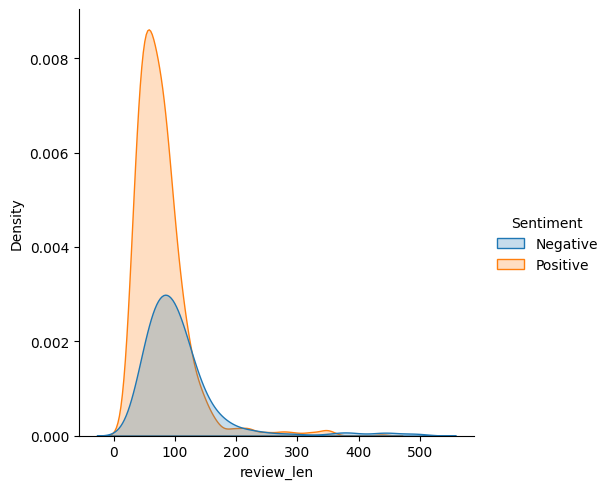

In [26]:
sns.displot(x= 'review_len', data = canva, hue = "Sentiment", kind = "kde", fill = True)
plt.show()

In [28]:
# lets find the length of words
canva["word_len"] = canva.review.apply(lambda x:len(str(x).split()))

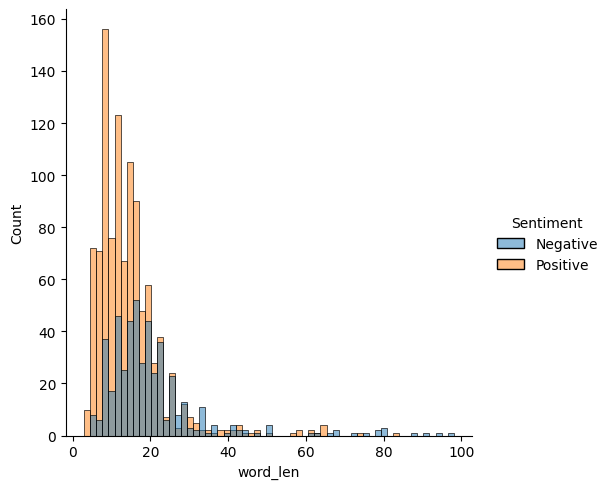

In [31]:
sns.displot(x= 'word_len', data = canva, hue = "Sentiment", fill = True)
plt.show()

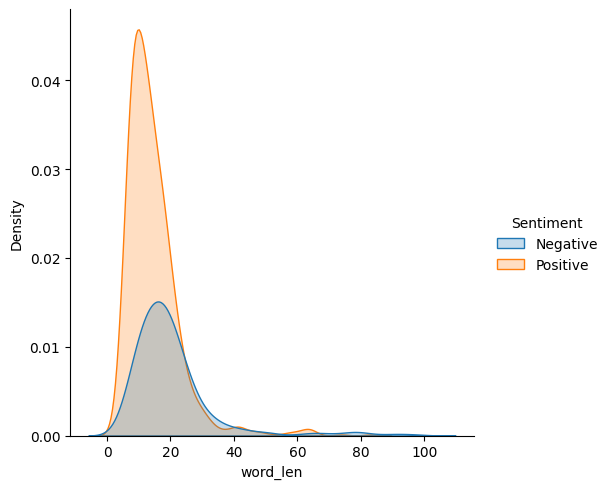

In [32]:
sns.displot(x= 'word_len', data = canva, hue = "Sentiment", kind = "kde", fill = True)
plt.show()

In [30]:
canva.word_len.describe()

count    1500.000000
mean       16.266667
std        10.851085
min         3.000000
25%        10.000000
50%        14.000000
75%        19.000000
max        98.000000
Name: word_len, dtype: float64

### Tokenization

In [38]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
regex = RegexpTokenizer('[a-zA-Z0-9]+')

In [42]:
print("Before Regex: ", canva.loc[9, "review"])
print("After Regex", regex.tokenize(canva.loc[9, "review"]))

Before Regex:  When I started trial everything works pretty well and so I decided to purchased every month and guess what! Every video I edited and saved was never been save at all even if how many times I tried, it was said was saved but when I check on my files it was not there, never been seen, and all pictures and caption is so blurred! And so I need to screenshoot and crop after so that I can use my edited design! What happen canva? So waste of moneyyyy!!!!!! I hope you can do solve this problem! Please
After Regex ['When', 'I', 'started', 'trial', 'everything', 'works', 'pretty', 'well', 'and', 'so', 'I', 'decided', 'to', 'purchased', 'every', 'month', 'and', 'guess', 'what', 'Every', 'video', 'I', 'edited', 'and', 'saved', 'was', 'never', 'been', 'save', 'at', 'all', 'even', 'if', 'how', 'many', 'times', 'I', 'tried', 'it', 'was', 'said', 'was', 'saved', 'but', 'when', 'I', 'check', 'on', 'my', 'files', 'it', 'was', 'not', 'there', 'never', 'been', 'seen', 'and', 'all', 'picture

In [95]:
# lets make a function to clean it
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download("stopwords")

stopwords = stopwords.words("english")
lemma = WordNetLemmatizer()
regex = RegexpTokenizer('[a-zA-Z0-9]+')


# Morphology is the study of structure of words in a language.
# It involves understanding how words are formed by combining morphemes, 
# which are the smallest meaningful units of language. 
# For example, the word ‘foxes’ can be decomposed into ‘fox’ 
# (the stem), and ‘es’ (a suffix indicating plurality)


def clean_text(text):
    text = text.lower()
    text = regex.tokenize(text)
    text = [word for word in text if word not in stopwords]
    return(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mukul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
clean_text(canva.loc[9, "review"])

['started',
 'trial',
 'everything',
 'works',
 'pretty',
 'well',
 'decided',
 'purchased',
 'every',
 'month',
 'guess',
 'every',
 'video',
 'edited',
 'saved',
 'never',
 'save',
 'even',
 'many',
 'times',
 'tried',
 'said',
 'saved',
 'check',
 'files',
 'never',
 'seen',
 'pictures',
 'caption',
 'blurred',
 'need',
 'screenshoot',
 'crop',
 'use',
 'edited',
 'design',
 'happen',
 'canva',
 'waste',
 'moneyyyy',
 'hope',
 'solve',
 'problem',
 'please']

In [59]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

word = "moneyyyy"

# Stemming
stemmed_word = stemmer.stem(word)
print(f"Stemmed word: {stemmed_word}")

# Lemmatization
lemmatized_word = lemmatizer.lemmatize(stemmed_word)
print(f"Lemmatized word: {lemmatized_word}")


Stemmed word: moneyyyi
Lemmatized word: moneyyyi


In [78]:
# Using Custom Mapping

from nltk.stem import WordNetLemmatizer

# Define a custom mapping for specific cases like "moneyyy" trtero "money"
custom_mapping = {
    "moneyyy": "money",
    "ooohhhh": "oh"}

# Custom lemmatization function with the custom mapping
def custom_lemmatize(word):
    if word in custom_mapping:
        return custom_mapping[word]
    else:
        return word

# List of words to lemmatize
words = ["a", "aa", "ooohhhh", "moneyyy"]

# Apply custom lemmatization
lemmatized_words = [custom_lemmatize(word) for word in words]
print(lemmatized_words)

['a', 'aa', 'oh', 'money']


### Stemming

Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as 'lemmas'" as provided

### Which One to Use in Text Cleaning:

* Porter vs. Snowball: Snowball Stemmer is more aggressive and can provide more accurate stems for certain words compared to the Porter Stemmer. If precision is crucial and the trade-off with speed is acceptable, Snowball may be preferred.

* Lancaster: Lancaster Stemmer, being the most aggressive, may not be the ideal choice for text cleaning tasks where precision and readability of stemmed words are important. It is generally less recommended due to its high level of aggressiveness and potential for confusion.

In text cleaning tasks, the choice between these stemmers depends on the specific requirements of the task. If precision and readability are essential, Snowball or Porter Stemmer may be more suitable, while Lancaster Stemmer might be considered in cases where aggressive stemming is acceptable and a significant reduction in the working set of words is needed.

In [89]:
list_words = ["Running", "Cries", "Leaves", "Playing", "Having", "Willing", "Going", "breath", "taking"]

from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

porter = PorterStemmer()
snow = SnowballStemmer(language="english", ignore_stopwords=True)
lancaster = LancasterStemmer()

porter_output = [porter.stem(word) for word in list_words]
print("Porter:", porter_output)

snow_output = [snow.stem(word) for word in list_words]
print("Snow:", snow_output)

lnc_output = [lancaster.stem(word) for word in list_words]
print("Lancaster:", lnc_output)

Porter: ['run', 'cri', 'leav', 'play', 'have', 'will', 'go', 'breath', 'take']
Snow: ['run', 'cri', 'leav', 'play', 'having', 'will', 'go', 'breath', 'take']
Lancaster: ['run', 'cri', 'leav', 'play', 'hav', 'wil', 'going', 'brea', 'tak']


In [149]:
# Lets apply the function....

def clean_text(text):
    text = re.sub("(www.+)|(\s+)|(@[a-zA-Z]+)|\W+", " ", text) # removes hyperlinks, special chars
    text = re.sub('(\w+:/\S+)', " ", text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub("http|https", " ", text)
    text = re.sub("[^a-zA-Z]+", " ", text)
    return(text)

canva["text_clean"] = canva.review.apply(clean_text)

In [150]:
import string

noise = string.punctuation

canva["text_clean"] = [word for word in canva.text_clean if word not in noise]

In [151]:
# lets tokenize the sentences into words

words = [word_tokenize(word) for word in canva.text_clean]

In [152]:
all_tokens = [token for review_tokens in words for token in review_tokens if token.lower() not in stopwords]

In [153]:
# Since we have recieved all the tokens, lets calculate the frequency of each token
df = pd.DataFrame(FreqDist(all_tokens).items(), columns = ["Tokens", "Frequency"]).sort_values(by = "Frequency", 
                                                                                         ascending = False)


df.head()

,Tokens,Frequency
3,app,841
49,use,313
231,easy,254
76,good,191
250,design,184


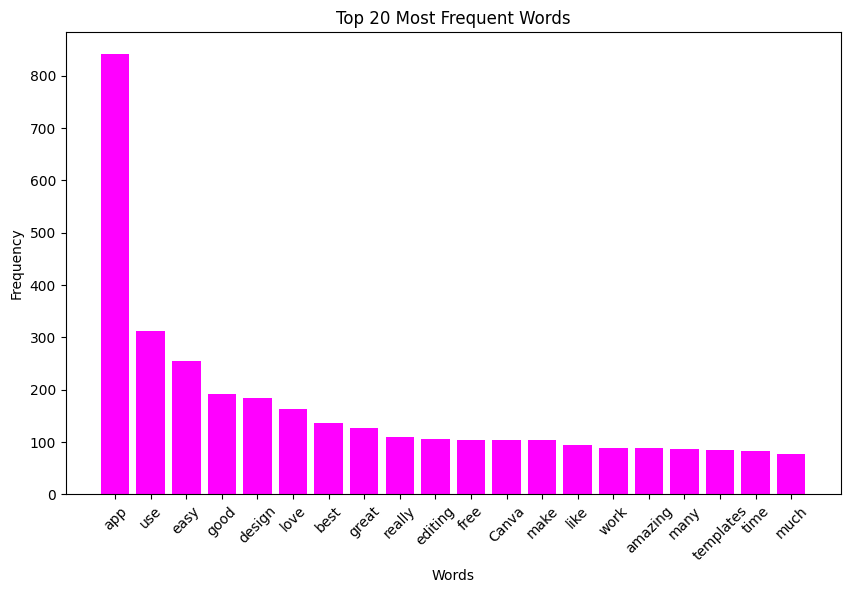

In [154]:
# lets visualize the frequency

# Plot a bar chart to visualize the most frequent words
plt.figure(figsize=(10, 6))
plt.bar(df['Tokens'][:20], df['Frequency'][:20], color='magenta')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

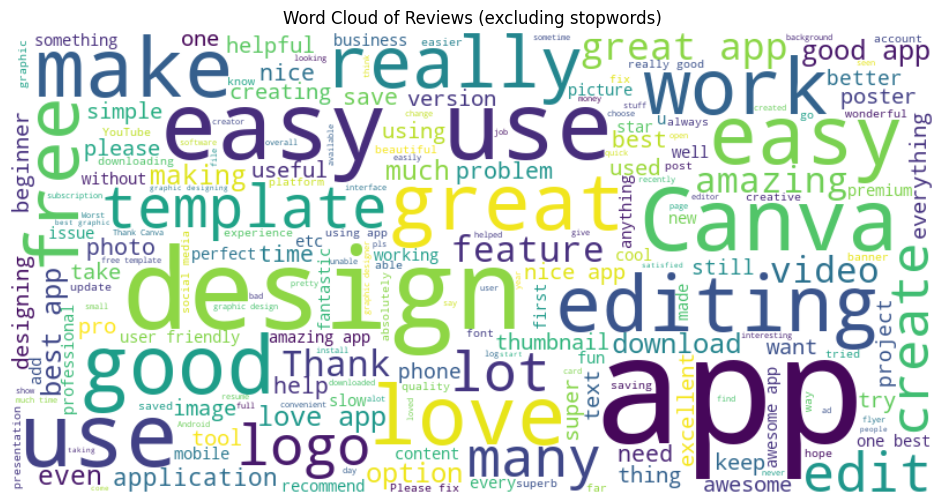

        Tokens  Frequency
3          app        841
49         use        313
231       easy        254
76        good        191
250     design        184
37        love        163
65        best        136
119      great        127
1       really        109
101    editing        105
171       free        104
74       Canva        103
120       make        103
223       like         94
143       work         89
2      amazing         88
17        many         87
307  templates         85
33        time         82
201       much         77


In [155]:
# lets generate the word cloud too...

# pip install wordcloud
from wordcloud import WordCloud


# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(12, 6))

# In image processing, interpolation refers to the method used to estimate the values of pixels at non-integer coordinates. 
# When displaying an image, interpolation determines how intermediate pixels are calculated 
# when resizing or transforming the image.

plt.imshow(wordcloud, interpolation='bilinear')

plt.title('Word Cloud of Reviews (excluding stopwords)')
plt.axis('off')
plt.show()

# Display the DataFrame
print(df.head(20))

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

countvector = CountVectorizer(binary = True, min_df = 5, stop_words="english")

converted = countvector.fit_transform(canva.text_clean).todense()

print(converted.shape)
print(len(countvector.get_feature_names_out()))

(1500, 392)
392


In [138]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object with the desired parameters
countvector = CountVectorizer(binary=True, min_df=5, stop_words="english")

# Fit and transform the text data using the CountVectorizer
converted = countvector.fit_transform(canva.text_clean)

# Convert the sparse matrix to a dense matrix for printing
converted_dense = converted.todense()

# Print the shape of the converted matrix
print(converted_dense.shape)

# Get the feature names from the CountVectorizer
feature_names = countvector.get_feature_names_out()

# Print the number of feature names
print(len(feature_names))


(1500, 392)
392


In [140]:
# Show the Output of Transformed Data after CountVectorizer
pd.DataFrame(converted_dense, columns =feature_names).head()

,aap,able,absolutely,access,account,add,adding,ads,alot,amazing,...,work,working,works,world,worst,worth,wow,wrong,years,youtube
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [141]:
canva["Sentiment"] = canva["Sentiment"].apply(lambda x: 1 if x=="Negative" else 0)

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a CountVectorizer object with the desired parameters
countvector = CountVectorizer(binary=True, min_df=5, stop_words="english")

# Fit and transform the text data using the CountVectorizer
converted = countvector.fit_transform(canva.text_clean)

# Convert the sparse matrix to a dense matrix for splitting
converted_dense = converted.todense()

# Convert the matrix to a NumPy array using np.asarray
converted_array = np.asarray(converted_dense)

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(converted_array, canva.Sentiment, test_size=0.20, random_state=42)

# Instantiate the LogisticRegression modelmcx 
logreg = LogisticRegression()

# Fit the model on the training data and make predictions on the test data
pred = logreg.fit(xtrain, ytrain).predict(xtest)

# Print the classification report
print(classification_report(ytest, pred))


              precision    recall  f1-score   support

    Negative       0.85      0.80      0.82        84
    Positive       0.92      0.94      0.93       216

    accuracy                           0.90       300
   macro avg       0.89      0.87      0.88       300
weighted avg       0.90      0.90      0.90       300

